# CASOS DE SÍNDROME RESPIRATÓRIA AGUDA GRAVE HOSPITALIZADOS
# Análise dos casos suspeitos e confirmados entre jovens de 18 a 35 anos de idade nos municípios de São José dos Campos, Jacareí e Caçapava

## Dados obtidos pelo OpenDatasus (26/06/2020), esta análise tem como objetivo verificar se há ou não algum risco para volta as aulas presenciais da faculdade FATEC Jessen Vidal

### O intervalo de idades foi previamente escolhido com base na média das idades dos alunos dentro da FATEC

In [1]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Algumas configurações para a leitura e o display dos dados
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
%config IPCompleter.greedy=True

plt.style.use('tableau-colorblind10')

In [3]:
# Lendo o arquivo dos dados
df = pd.read_csv("INFLUD-23-06-2020.csv", encoding = 'latin1', 
                 sep=';', error_bad_lines=False, warn_bad_lines=True)

In [4]:
# Dimensão do DataFrame
df.shape

(326193, 134)

In [5]:
# Informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326193 entries, 0 to 326192
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 333.5+ MB


In [6]:
# Exibindo um exemplo, para confirmar a leitura
df.sample()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
319741,22/06/2020,26,08/06/2020,24,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,HOSPITAL ALIANCA,2389746,M,11/06/1977,42,3,3042,6,9.0,NaN,9.0,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,1.0,2.0,2.0,9.0,1.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,22/06/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,9.0,00000000,22/06/2020,22/06/2020,2,NaN,NaN,NaN,00000000,00000000,1.0,NaN,NaN


In [7]:
# Casos suspeitos, crises respiratórias agudas entre 18-35 anos
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and NU_IDADE_N >= 18 and NU_IDADE_N <= 35')['ID_MUNICIP'].value_counts()

SAO JOSE DOS CAMPOS    183
Name: ID_MUNICIP, dtype: int64

# Número de casos confirmados entre jovens de 18 a 35 anos!

In [8]:
# Número de casos CONFIRMADOS entre 18-35 anos
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and NU_IDADE_N >= 18 and NU_IDADE_N <= 35 \
          and CLASSI_FIN == 5')['ID_MUNICIP'].value_counts()

SAO JOSE DOS CAMPOS    59
Name: ID_MUNICIP, dtype: int64

### No município de São José dos Campos, 59 casos foram confirmados entre as idades citadas!

### Casos suspeitos em São José dos Campos - 18-35 anos

In [19]:
# Entre 18-35 anos
jovensSJC = df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and NU_IDADE_N >= 18 and NU_IDADE_N <= 35')['ID_MUNICIP'].value_counts()
jovensSJC

SAO JOSE DOS CAMPOS    183
Name: ID_MUNICIP, dtype: int64

In [30]:
# Resto das outras idades inferiores a 18
inferiorSJC = df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and NU_IDADE_N < 18')['ID_MUNICIP'].value_counts()
inferiorSJC

SAO JOSE DOS CAMPOS    155
Name: ID_MUNICIP, dtype: int64

In [31]:
# Resto das outras idades superiores a 35
superiorSJC = df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and NU_IDADE_N > 35')['ID_MUNICIP'].value_counts()
superiorSJC

SAO JOSE DOS CAMPOS    1143
Name: ID_MUNICIP, dtype: int64

### Veremos agora, a porcentagem baseada na média das idade dos alunos e o resto das idades, no município de em São José dos Campos (casos suspeitos)

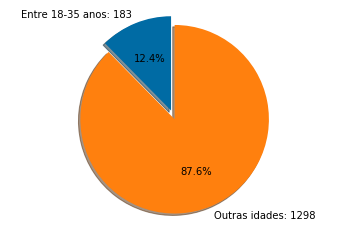

In [32]:
# Definimos os títulos a serem mostrados no gráfico
labels = (f'Entre 18-35 anos: {jovensSJC[0]}'), (f'Outras idades: {totalInferior[0] + totalSuperior[0]}')
# Agora os valores a serem exibidos, seguindo a mesma ordem dos títulos
sizes = [jovensSJC[0], (inferiorSJC[0] + superiorSJC[0])]
explode = (0.1, 0) # definindo o espaço de separação do pedaço da pizza (jovens) ...

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio garante que o grafico seja desenhado como um círculo

plt.show()

### 

## Casos suspeitos em Caçapava - 18-35 anos

In [21]:
# Casos suspeitos, crises respiratórias agudas entre 18-35 anos - Caçapava
jovensCacapava = df.query('ID_MUNICIP == "CACAPAVA" and NU_IDADE_N >= 18 and NU_IDADE_N <= 35')['ID_MUNICIP'].value_counts()
jovensCacapava

CACAPAVA    19
Name: ID_MUNICIP, dtype: int64

In [25]:
# Resto das outras idades inferiores a 18
cacapavaInferior = df.query('ID_MUNICIP == "CACAPAVA" and NU_IDADE_N < 18')['ID_MUNICIP'].value_counts()
cacapavaInferior

CACAPAVA    9
Name: ID_MUNICIP, dtype: int64

In [23]:
# Resto das outras idades superiores a 35
cacapavaSuperior = df.query('ID_MUNICIP == "CACAPAVA" and NU_IDADE_N > 35')['ID_MUNICIP'].value_counts()
cacapavaSuperior

CACAPAVA    70
Name: ID_MUNICIP, dtype: int64

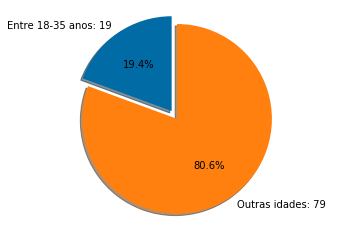

In [26]:
# Definimos os títulos a serem mostrados no gráfico
labels = (f'Entre 18-35 anos: {jovensCacapava[0]}'), (f'Outras idades: {cacapavaInferior[0] + cacapavaSuperior[0]}')
# Agora os valores a serem exibidos, seguindo a mesma ordem dos títulos
sizes = [jovensCacapava[0], (cacapavaInferior[0] + cacapavaSuperior[0])]
explode = (0.1, 0) # definindo o espaço de separação do pedaço da pizza (jovens) ...

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio garante que o grafico seja desenhado como um círculo

plt.show()

## Casos suspeitos em Jacareí - 18-35 anos

In [22]:
# Casos suspeitos, crises respiratórias agudas entre 18-35 anos - Jacareí
jovensJacarei = df.query('ID_MUNICIP == "JACAREI" and NU_IDADE_N >= 18 and NU_IDADE_N <= 35')['ID_MUNICIP'].value_counts()
jovensJacarei

JACAREI    55
Name: ID_MUNICIP, dtype: int64

In [27]:
# Resto das outras idades inferiores a 18
jacareiInferior = df.query('ID_MUNICIP == "JACAREI" and NU_IDADE_N < 18')['ID_MUNICIP'].value_counts()
jacareiInferior

JACAREI    38
Name: ID_MUNICIP, dtype: int64

In [24]:
# Resto das outras idades superiores a 35
jacareiSuperior = df.query('ID_MUNICIP == "JACAREI" and NU_IDADE_N > 35')['ID_MUNICIP'].value_counts()
jacareiSuperior

JACAREI    306
Name: ID_MUNICIP, dtype: int64

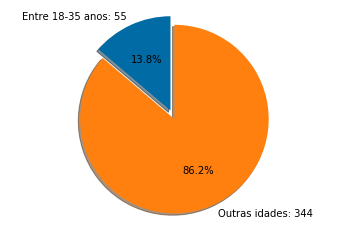

In [28]:
# Definimos os títulos a serem mostrados no gráfico
labels = (f'Entre 18-35 anos: {jovensJacarei[0]}'), (f'Outras idades: {jacareiInferior[0] + jacareiSuperior[0]}')
# Agora os valores a serem exibidos, seguindo a mesma ordem dos títulos
sizes = [jovensJacarei[0], (jacareiInferior[0] + jacareiSuperior[0])]
explode = (0.1, 0) # definindo o espaço de separação do pedaço da pizza (jovens) ...

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio garante que o grafico seja desenhado como um círculo

plt.show()

## Totalizando o total das idades nos 3 municípios

In [38]:
# Número total de casos suspeitos entre jovens dos 3 municípios
jovensTotal = jovensSJC[0] + jovensCacapava[0] + jovensJacarei[0]
jovensTotal

257

In [39]:
# Número total de casos suspeitos para menores de 18 anos dos 3 municípios
inferiorTotal = inferiorSJC[0] + cacapavaInferior[0] + jacareiInferior[0]
inferiorTotal

202

In [40]:
# Número total de casos suspeitos para maiores de 35 anos dos 3 municípios
superiorTotal = superiorSJC[0] + cacapavaSuperior[0] + jacareiSuperior[0]
superiorTotal

1519

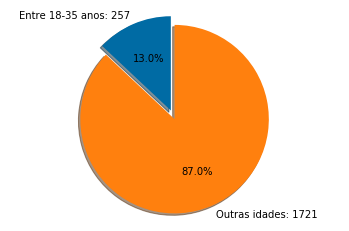

In [41]:
# Definimos os títulos a serem mostrados no gráfico
labels = (f'Entre 18-35 anos: {jovensTotal}'), (f'Outras idades: {inferiorTotal + superiorTotal}')
# Agora os valores a serem exibidos, seguindo a mesma ordem dos títulos
sizes = [jovensTotal, (inferiorTotal + superiorTotal)]
explode = (0.1, 0) # definindo o espaço de separação do pedaço da pizza (jovens) ...

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio garante que o grafico seja desenhado como um círculo

plt.show()

### Em uma volta repentina das atividades presenciais na FATEC Jessen Vidal, a chance de se contrair o COVID-19 é de 13% baseado na média de idade dos alunos presentes na Faculdade

#### Obs: A porcertagem é uma previsão de um cenário onde todos os jovens dos 3 principais municípios estivessem contaminados por COVID-19 e fossem alunos da faculdade.